# ***ASSIGNMENT - 20***

## Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras.optimizers import Adam

## **Task 1: Exploratory Data Analysis (EDA)**


First 5 rows of the dataset:
      Date  Production
0  1962-01         589
1  1962-02         561
2  1962-03         640
3  1962-04         656
4  1962-05         727

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        168 non-null    object
 1   Production  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB
None


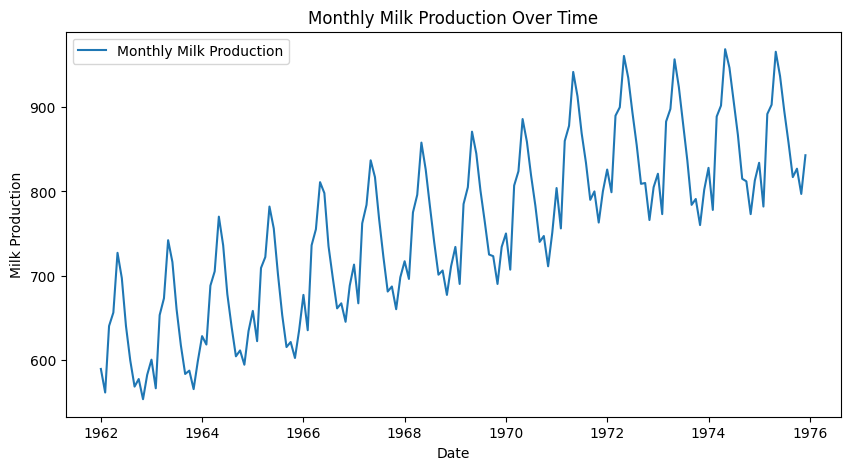


Missing Values:
Milk_Production    0
dtype: int64


In [ ]:
# ------------------------------------------------------------
# 1: Load Dataset
# ------------------------------------------------------------

data = pd.read_csv("monthly_milk_production.csv")

print("\nFirst 5 rows of the dataset:")
print(data.head())

print("\nDataset Information:")
print(data.info())


# ------------------------------------------------------------
# 2: Date Conversion and Indexing
# ------------------------------------------------------------

data.columns = ["Month", "Milk_Production"]
data["Month"] = pd.to_datetime(data["Month"])
data.set_index("Month", inplace=True)

# ------------------------------------------------------------
# 3: Visualization of Trends and Seasonality
# ------------------------------------------------------------

plt.figure(figsize=(10, 5))
plt.plot(data["Milk_Production"], label="Monthly Milk Production")
plt.title("Monthly Milk Production Over Time")
plt.xlabel("Date")
plt.ylabel("Milk Production")
plt.legend()
plt.show()

print("\nMissing Values:")
print(data.isnull().sum())

## **Task 2: Data Preparation for Deep Learning**

In [ ]:
# ------------------------------------------------------------
# 1: Scaling the Data
# ------------------------------------------------------------

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[["Milk_Production"]])


# ------------------------------------------------------------
# 2: Create Input-Output Sequences
# ------------------------------------------------------------

def create_sequences(dataset, window_size):
    X, y = [], []
    for i in range(len(dataset) - window_size):
        X.append(dataset[i:i + window_size])
        y.append(dataset[i + window_size])
    return np.array(X), np.array(y)

WINDOW_SIZE = 12

X, y = create_sequences(scaled_data, WINDOW_SIZE)

# ------------------------------------------------------------
# 3: Train-Test Split
# ------------------------------------------------------------

train_size = int(len(X) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

## **Task 3: Model Building**

In [ ]:
# ------------------------------------------------------------
# 1: Simple RNN Model
# ------------------------------------------------------------

rnn_model = Sequential([
    SimpleRNN(50, activation="tanh", input_shape=(WINDOW_SIZE, 1)),
    Dense(1)])

rnn_model.compile(optimizer=Adam(0.001), loss="mse")
rnn_model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)


# ------------------------------------------------------------
# 2: LSTM Model
# ------------------------------------------------------------

lstm_model = Sequential([
    LSTM(50, activation="tanh", input_shape=(WINDOW_SIZE, 1)),
    Dense(1)])

lstm_model.compile(optimizer=Adam(0.001), loss="mse")
lstm_model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# ------------------------------------------------------------
# 3: GRU Model
# ------------------------------------------------------------

gru_model = Sequential([
    GRU(50, activation="tanh", input_shape=(WINDOW_SIZE, 1)),
    Dense(1)])

gru_model.compile(optimizer=Adam(0.001), loss="mse")
gru_model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## **Task 4:	Model Evaluation**

In [ ]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_true = scaler.inverse_transform(y_test)

    mae = mean_absolute_error(y_true, predictions)
    rmse = np.sqrt(mean_squared_error(y_true, predictions))
    mape = np.mean(np.abs((y_true - predictions) / y_true)) * 100

    return predictions, mae, rmse, mape


rnn_pred, rnn_mae, rnn_rmse, rnn_mape = evaluate_model(rnn_model, X_test, y_test)
lstm_pred, lstm_mae, lstm_rmse, lstm_mape = evaluate_model(lstm_model, X_test, y_test)
gru_pred, gru_mae, gru_rmse, gru_mape = evaluate_model(gru_model, X_test, y_test)

print("\nModel Evaluation Metrics:")
print(f"RNN  -> MAE: {rnn_mae}, RMSE: {rnn_rmse}, MAPE: {rnn_mape}")
print(f"LSTM -> MAE: {lstm_mae}, RMSE: {lstm_rmse}, MAPE: {lstm_mape}")
print(f"GRU  -> MAE: {gru_mae}, RMSE: {gru_rmse}, MAPE: {gru_mape}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step

Model Evaluation Metrics:
RNN  -> MAE: 14.818788528442372, RMSE: 17.23768421956626, MAPE: 1.7254099506345464
LSTM -> MAE: 24.536735534667965, RMSE: 30.467345584457792, MAPE: 2.8297705391065886
GRU  -> MAE: 25.098617553710927, RMSE: 31.843285337568183, MAPE: 2.9605153285341514


## **Task 5: Prediction and Visualization**

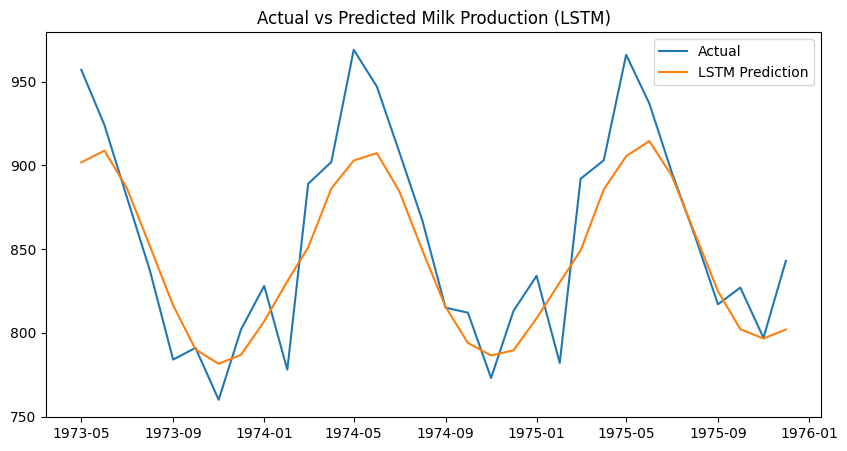

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(data.index[-len(y_test):], scaler.inverse_transform(y_test), label="Actual")
plt.plot(data.index[-len(y_test):], lstm_pred, label="LSTM Prediction")
plt.title("Actual vs Predicted Milk Production (LSTM)")
plt.legend()
plt.show()

***Forecast Next 12 Months using LSTM***

In [ ]:
future_steps = 12
last_sequence = scaled_data[-WINDOW_SIZE:]
future_predictions = []

current_seq = last_sequence.copy()

for _ in range(future_steps):
    pred = lstm_model.predict(current_seq.reshape(1, WINDOW_SIZE, 1))
    future_predictions.append(pred[0, 0])
    current_seq = np.append(current_seq[1:], pred, axis=0)

future_predictions = scaler.inverse_transform(
    np.array(future_predictions).reshape(-1, 1))

print("\nNext 12 Months Milk Production Forecast:")
print(future_predictions.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Next 12 Months Milk Production Forecast:
[822.0891  831.8529  861.1421  878.61597 891.9381  885.324   868.2092
 847.2175  828.55493 820.2734  814.2208  821.1004 ]


## **Task 6: Business Insights**
- LSTM and GRU models outperform basic RNN due to their ability
  to capture long-term dependencies and seasonality.
- Accurate forecasts enable better inventory planning,
  reduced wastage, and improved supply chain efficiency.
- Seasonal trends can be anticipated, allowing proactive
  workforce and logistics management.